<a href="https://colab.research.google.com/github/OlhaYastrebova/goit-ds-hw/blob/main/Hw5_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
Прочитайте дані за допомогою методу read_html з таблиці "Коефіцієнт народжуваності в регіонах України (1950—2019)"

In [56]:
import pandas as pd

# URL сторінки з таблицями
url = "https://uk.wikipedia.org/wiki/%D0%9D%D0%B0%D1%81%D0%B5%D0%BB%D0%B5%D0%BD%D0%BD%D1%8F_%D0%A3%D0%BA%D1%80%D0%B0%D1%97%D0%BD%D0%B8"

# Читання всіх таблиць з веб-сторінки
tables = pd.read_html(url)

# Перевірка кількості знайдених таблиць
print(f"Знайдено таблиць: {len(tables)}\n")

# Виведення потрібної таблиці "Коефіцієнт народжуваності в регіонах України (1950—2019)" з індексом 12
table_12 = tables[12]

# Замінюємо коми на крапки
table_12 = pd.read_html(url, thousands=' ')[12]
print(table_12)



Знайдено таблиць: 77

               Регіон  1950  1960  1970  1990  2000  2012  2014  2019
0                Крим  23,0  20,6  16,0  13,0   7,3  12,6     —     —
1           Вінницька  22,4  19,2  14,2  12,4   8,4  11,2  10,9   7,6
2           Волинська  24,7  25,0  17,9  15,3  11,2  14,8  14,1  10,1
3    Дніпропетровська  20,4  20,4  15,1  12,3   7,1  11,2  11,1   7,1
4            Донецька  27,1  21,4  14,0  10,9   6,1   9,8   8,2     —
5         Житомирська  26,1  22,3  15,9  12,9   8,9  12,2  12,0   7,9
6        Закарпатська  31,4  27,3  20,7  16,8  11,5  15,1  14,6  10,4
7          Запорізька  21,9  19,7  15,0  12,4   7,1  10,6  10,6   6,8
8   Івано-Франківська  24,3  24,8  18,2  15,5  10,3  12,4  12,2   8,8
9            Київська  20,4  18,9  15,6  12,3   7,3  12,2  12,1   8,0
10     Кіровоградська  21,6  17,1  14,5  12,6   7,9  11,0  10,8   6,8
11          Луганська  26,2  23,5  14,4  11,6   6,2   9,6   5,1     —
12          Львівська  23,4  24,0  17,1  14,0   9,1  11,9  11,9   8,

Вивести перші рядки таблиці за допомогою методу head

In [57]:
print(table_12.head())

             Регіон  1950  1960  1970  1990  2000  2012  2014  2019
0              Крим  23,0  20,6  16,0  13,0   7,3  12,6     —     —
1         Вінницька  22,4  19,2  14,2  12,4   8,4  11,2  10,9   7,6
2         Волинська  24,7  25,0  17,9  15,3  11,2  14,8  14,1  10,1
3  Дніпропетровська  20,4  20,4  15,1  12,3   7,1  11,2  11,1   7,1
4          Донецька  27,1  21,4  14,0  10,9   6,1   9,8   8,2     —


Визначте кількість рядків та стовпців у датафреймі (атрибут shape)

In [58]:
rows, columns = table_12.shape
print(f"Кількість рядків: {rows}")
print(f"Кількість стовпців: {columns}")


Кількість рядків: 28
Кількість стовпців: 9


Замініть у таблиці значення "—" на значення NaN

In [59]:
import numpy as np

# Замінюємо значення "—" на NaN
table_12.replace("—", np.nan, inplace=True)

# Виведення перших кількох рядків таблиці для перевірки
print(table_12.head())

             Регіон  1950  1960  1970  1990  2000  2012  2014  2019
0              Крим  23,0  20,6  16,0  13,0   7,3  12,6   NaN   NaN
1         Вінницька  22,4  19,2  14,2  12,4   8,4  11,2  10,9   7,6
2         Волинська  24,7  25,0  17,9  15,3  11,2  14,8  14,1  10,1
3  Дніпропетровська  20,4  20,4  15,1  12,3   7,1  11,2  11,1   7,1
4          Донецька  27,1  21,4  14,0  10,9   6,1   9,8   8,2   NaN


Визначте типи всіх стовпців за допомогою dataframe.dtypes

In [60]:
print(table_12.dtypes)

Регіон    object
1950      object
1960      object
1970      object
1990      object
2000      object
2012      object
2014      object
2019      object
dtype: object


Замініть типи нечислових колонок на числові. Підказка - це колонки, де знаходився символ "—"

In [61]:
# Замінюємо коми на крапки
table_12.replace(',', '.', regex=True, inplace=True)

# Перетворюємо стовпці на числові значення
columns_to_correct = table_12.columns[1:]  # Вибираємо всі стовпці, окрім першого
table_12[columns_to_correct] = table_12[columns_to_correct].apply(pd.to_numeric, errors='coerce')

# Виведення перших кількох рядків таблиці для перевірки
print(table_12.head())


             Регіон  1950  1960  1970  1990  2000  2012  2014  2019
0              Крим  23.0  20.6  16.0  13.0   7.3  12.6   NaN   NaN
1         Вінницька  22.4  19.2  14.2  12.4   8.4  11.2  10.9   7.6
2         Волинська  24.7  25.0  17.9  15.3  11.2  14.8  14.1  10.1
3  Дніпропетровська  20.4  20.4  15.1  12.3   7.1  11.2  11.1   7.1
4          Донецька  27.1  21.4  14.0  10.9   6.1   9.8   8.2   NaN


Порахуйте, яка частка пропусків міститься в кожній колонці (використовуйте методи isnull та sum)

In [62]:
# Розрахунок частки пропусків у кожному стовпці
missing_data = table_12.isnull().sum()
missing_fraction = missing_data / len(table_12)

# Виведення частки пропусків у кожному стовпці
print(missing_fraction)

Регіон    0.000000
1950      0.071429
1960      0.035714
1970      0.035714
1990      0.000000
2000      0.000000
2012      0.000000
2014      0.071429
2019      0.142857
dtype: float64


Видаліть з таблиці дані по всій країні, останній рядок таблиці

In [46]:
# Видалення останнього рядка таблиці
table_12_cleaned = table_12.drop(index=table_12.index[-1])

# Виведення очищеної таблиці для перевірки
print(table_12_cleaned)

               Регіон  1950  1960  1970  1990  2000  2012  2014  2019
0                Крим  23.0  20.6  16.0  13.0   7.3  12.6   NaN   NaN
1           Вінницька  22.4  19.2  14.2  12.4   8.4  11.2  10.9   7.6
2           Волинська  24.7  25.0  17.9  15.3  11.2  14.8  14.1  10.1
3    Дніпропетровська  20.4  20.4  15.1  12.3   7.1  11.2  11.1   7.1
4            Донецька  27.1  21.4  14.0  10.9   6.1   9.8   8.2   NaN
5         Житомирська  26.1  22.3  15.9  12.9   8.9  12.2  12.0   7.9
6        Закарпатська  31.4  27.3  20.7  16.8  11.5  15.1  14.6  10.4
7          Запорізька  21.9  19.7  15.0  12.4   7.1  10.6  10.6   6.8
8   Івано-Франківська  24.3  24.8  18.2  15.5  10.3  12.4  12.2   8.8
9            Київська  20.4  18.9  15.6  12.3   7.3  12.2  12.1   8.0
10     Кіровоградська  21.6  17.1  14.5  12.6   7.9  11.0  10.8   6.8
11          Луганська  26.2  23.5  14.4  11.6   6.2   9.6   5.1   NaN
12          Львівська  23.4  24.0  17.1  14.0   9.1  11.9  11.9   8.7
13       Миколаївськ

Замініть відсутні дані в стовпцях середніми значеннями цих стовпців (метод fillna)

In [47]:
# Заповнюємо відсутні дані середніми значеннями для числових стовпців
table_12.fillna(table_12.mean(numeric_only=True), inplace=True)

# Виведення перших кількох рядків таблиці для перевірки
print(table_12.head())

             Регіон  1950  1960  1970  1990  2000  2012       2014       2019
0              Крим  23.0  20.6  16.0  13.0   7.3  12.6  11.142308   8.020833
1         Вінницька  22.4  19.2  14.2  12.4   8.4  11.2  10.900000   7.600000
2         Волинська  24.7  25.0  17.9  15.3  11.2  14.8  14.100000  10.100000
3  Дніпропетровська  20.4  20.4  15.1  12.3   7.1  11.2  11.100000   7.100000
4          Донецька  27.1  21.4  14.0  10.9   6.1   9.8   8.200000   8.020833


Отримайте список регіонів, де рівень народжуваності у 2019 році був вищим за середній по Україні

In [48]:
# Знаходимо середнє значення для стовпця 2019 року
mean_2019 = table_12['2019'].mean()

# Фільтруємо регіони з рівнем народжуваності у 2019 році вище середнього
regions_above_average = table_12[table_12['2019'] > mean_2019]

# Отримуємо список регіонів
regions_list = regions_above_average['Регіон'].tolist()

# Виведення результату
print("Регіони з рівнем народжуваності у 2019 році вищим за середнє по Україні:")
print(regions_list)

Регіони з рівнем народжуваності у 2019 році вищим за середнє по Україні:
['Волинська', 'Закарпатська', 'Івано-Франківська', 'Львівська', 'Одеська', 'Рівненська', 'Херсонська', 'Чернівецька', 'Київ', 'Україна']


У якому регіоні була найвища народжуваність у 2014 році?

In [49]:
# Знаходимо максимальне значення для стовпця 2014 року
max_value_2014 = table_12['2014'].max()

# Знаходимо регіон з максимальним значенням
region_max_value_2014 = table_12[table_12['2014'] == max_value_2014]['Регіон'].iloc[0]

# Виведення результату
print(f"Регіон з найвищим рівнем народжуваності у 2014 році: {region_max_value_2014}")

Регіон з найвищим рівнем народжуваності у 2014 році: Рівненська


Побудуйте стовпчикову діаграму народжуваності по регіонах у 2019 році

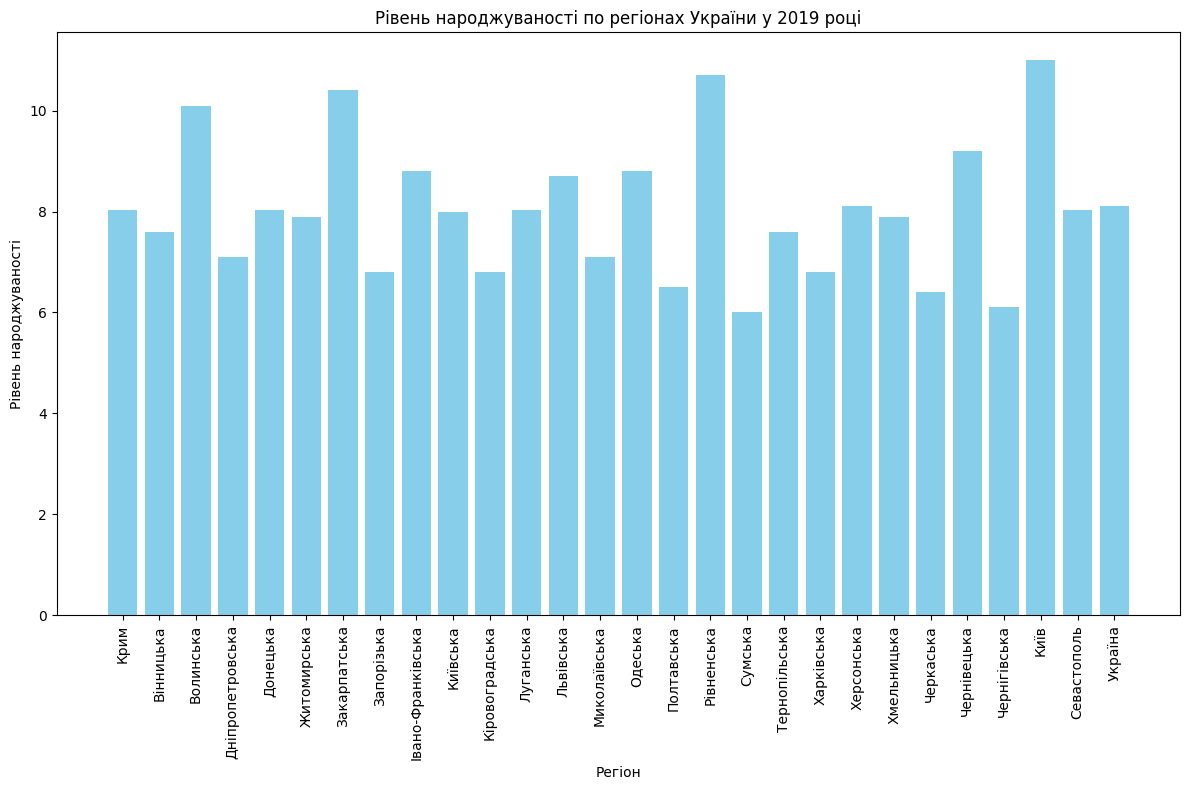

In [50]:
import matplotlib.pyplot as plt
# Створюємо стовпчикову діаграму для рівня народжуваності у 2019 році
plt.figure(figsize=(12, 8))
plt.bar(table_12['Регіон'], table_12['2019'], color='skyblue')

# Налаштування графіка
plt.xlabel('Регіон')
plt.ylabel('Рівень народжуваності')
plt.title('Рівень народжуваності по регіонах України у 2019 році')
plt.xticks(rotation=90)  # Поворот підписів осі x для кращої читабельності
plt.tight_layout()  # Автоматичне налаштування розміщення елементів

# Показати графік
plt.show()

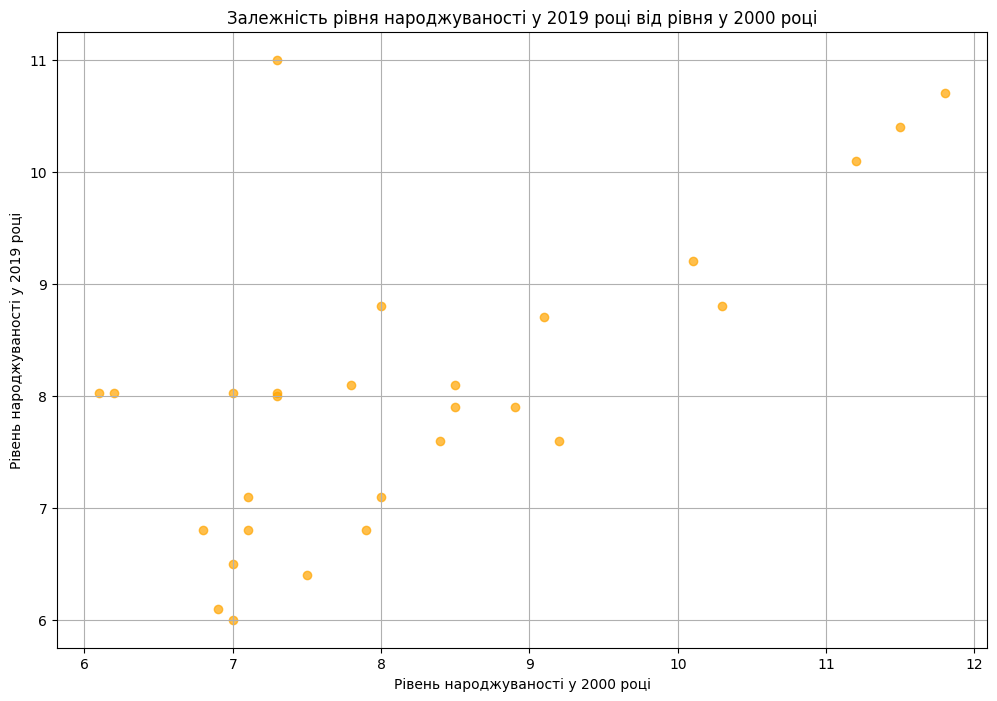

In [51]:
# Створення діаграми розсіювання
plt.figure(figsize=(12, 8))
plt.scatter(table_12['2000'], table_12['2019'], color='orange', alpha=0.7)

# Налаштування графіка
plt.xlabel('Рівень народжуваності у 2000 році')
plt.ylabel('Рівень народжуваності у 2019 році')
plt.title('Залежність рівня народжуваності у 2019 році від рівня у 2000 році')
plt.grid(True)

# Показати графік
plt.show()

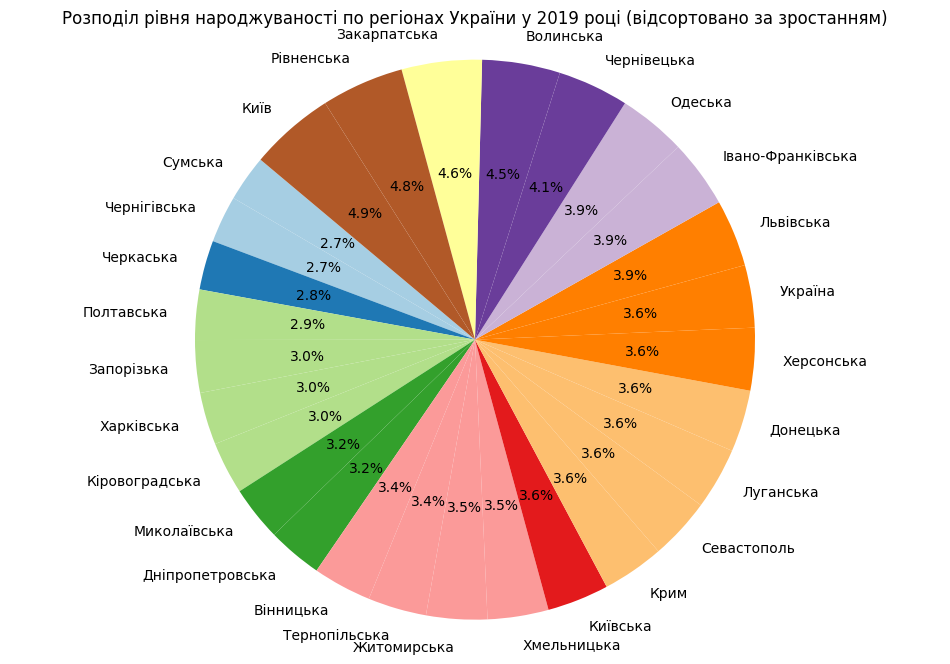

In [52]:
from matplotlib.colors import to_hex
# Підготовка даних для кругової діаграми
regions = table_12['Регіон']
birth_rates_2019 = table_12['2019'].dropna()  # Видаляємо NaN значення для коректної візуалізації

# Сортування даних
sorted_indices = birth_rates_2019.sort_values().index
sorted_regions = regions[sorted_indices]
sorted_birth_rates_2019 = birth_rates_2019.sort_values()

# Отримання унікальних значень та присвоєння кольорів
unique_birth_rates = sorted_birth_rates_2019.unique()
colors = plt.cm.Paired(np.linspace(0, 1, len(unique_birth_rates)))

# Створюємо словник для присвоєння кольорів кожному значенню
color_map = dict(zip(unique_birth_rates, colors))

# Застосування кольорів до даних
pie_colors = [to_hex(color_map[rate]) for rate in sorted_birth_rates_2019]

# Створення кругової діаграми
plt.figure(figsize=(12, 8))
plt.pie(sorted_birth_rates_2019, labels=sorted_regions, autopct='%1.1f%%', startangle=140, colors=pie_colors)

# Налаштування графіка
plt.title('Розподіл рівня народжуваності по регіонах України у 2019 році (відсортовано за зростанням)')
plt.axis('equal')  # Зробити коло круглим, а не овальним

# Показати графік
plt.show()